___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [106]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 0.186,  0.18 ,  0.151,  0.159,  0.168,  0.156]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

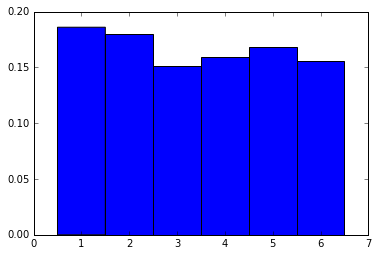

In [108]:
freq = []
for i in range (1000):
    sorteio = randint(1,7)
    freq.append(sorteio)
faixas = np.arange (0.5,7,1)
plt.hist(freq, normed=True, bins=faixas)

a) Não é igual para cada face. 
b) Apesar do randint ser aparentemente aleátorio, o algorítmo segue um padrão que não é exatamente aleátorio. Não é possível fazer um algorítmo de aleatoridade com outro, portanto nunca erá perfeitamente aleátorio.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [109]:
freqSoma = []
for i in range (1000):
    sorteioA = randint(1,7)
    sorteioB = randint(1,7)
    soma = sorteioA + sorteioB
    if soma == 7:
        freqSoma.append("Sim") #Sim
    else:
        freqSoma.append("Não") #Não
print("A probabilidade da soma dar 7 é: ",((freqSoma.count("Sim")/len(freqSoma))*100))

A probabilidade da soma dar 7 é:  16.6


In [110]:
valores = []
for i in range (1000):
    sorteioA = randint(1,7)
    soma = sorteioA + 5
    if soma == 7:
        valores.append("Sim")
    else:
        valores.append("Não")
print(freqSoma.count("Sim")/len(valores)*100)

16.6


b) Trata-se de uma probabilidade condicionada de eventos independentes. O resultado de um dado não interfere no outro. A fórmula para cálculo é igual a: P(B|A) = P(B).P(A)/P(A) = P(B). Portanto, a probabilidade é a mesma.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [136]:
ganha = []
perde = []

for i in range (10000):
    portas = [1,2,3]
    porta_premiada = choice(portas)
    porta_escolhida = choice(portas)
    porta_aberta = 0
    if porta_premiada == porta_escolhida:
        portas.remove(porta_premiada)
        porta_aberta = choice(portas)
        perde.append("Perdeu")
        
    else:
        portas.remove(porta_premiada)
        portas.remove(porta_escolhida)
        porta_aberta = choice(portas)
        ganha.append("Ganhou")
        
print("A porcentagem de vezes em que o indivíduo ganhou é: ",len(ganha)/100)

A porcentagem de vezes em que o indivíduo ganhou é:  66.1
